In [28]:
#date, species, do I have a compiled version of the creatures?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import dateutil

In [2]:
df =  pd.read_csv('Created CSVs/Cleaned_For_Analysis_Compressed_By_Day.csv')

In [3]:
df['Date'] =  [dateutil.parser.parse(date) for date in list(df['Date'])]

In [4]:
df['year'] = [x.year for x in df['Date']]

In [5]:
df['# Species Caught'] = [len(list(set(x.split(',')))) for x in df['Corrected Common Name']]

In [6]:
df['Day of the Year'] =  [x.timetuple().tm_yday for x in df['Date']]

In [10]:
sns.set()

In [71]:
df.columns

Index([u'Unnamed: 0', u'Date', u'Time', u'Weather & Air Temp:', u'Water Temp:',
       u'Corrected Water Temp:', u'pH', u'Corrected pH', u'DO',
       u'Corrected DO', u'Turbidity', u'Salinity', u'Corrected Salinity',
       u'Tide is moving', u'Tide Times', u'# Hauls', u'Corrected # Hauls',
       u'Common Name', u'Corrected Common Name',
       u'Grouped Corrected Common Name', u'Quantity', u'Corrected Quantity',
       u'Scientific Name', u'Instructors/ Seine Staff:',
       u'# student seiners (CLASSES ONLY)',
       u'# of visitors (Public Seine ONLY)', u'# Brought to Ed Center',
       u'NOTES FROM SEINEING SEASON:', u'year', u'# Species Caught',
       u'Day of the Year', u'Month', u'Total Organisms Caught'],
      dtype='object')

In [75]:
df_num_seins = df.groupby("year", as_index=False).count()[["year", "Unnamed: 0"]]

In [78]:
df_num_seins = df_num_seins.rename(columns={"Unnamed: 0": "Number of Seins"})

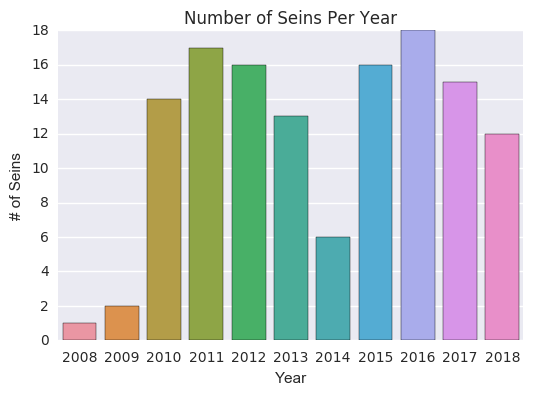

In [81]:
sns.barplot(df_num_seins["year"], df_num_seins["Number of Seins"])
plt.title("Number of Seins Per Year")
plt.ylabel("# of Seins")
plt.xlabel("Year")
plt.savefig('Graphs/Number of Seins Per Year')

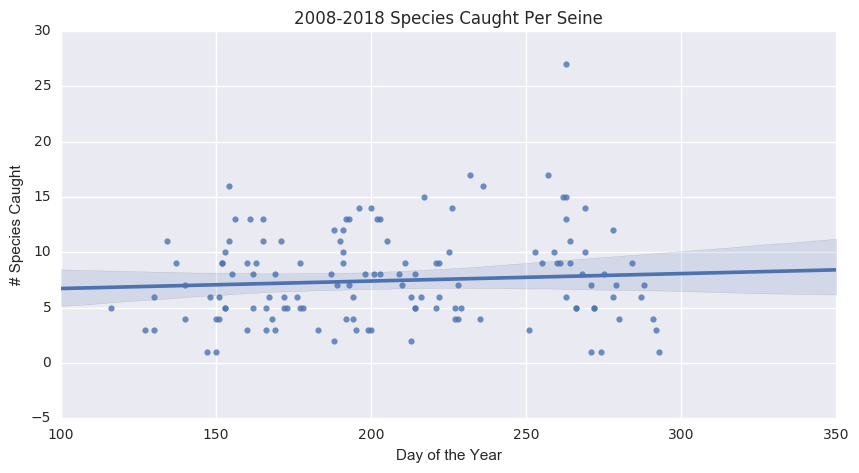

In [11]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df['Day of the Year'], df['# Species Caught'], ci = 95, robust = True)
ax.set_title('2008-2018 Species Caught Per Seine')
ax.figure.savefig('Graphs/BOP_2008_2018_Species_Caught_Per_Seine')

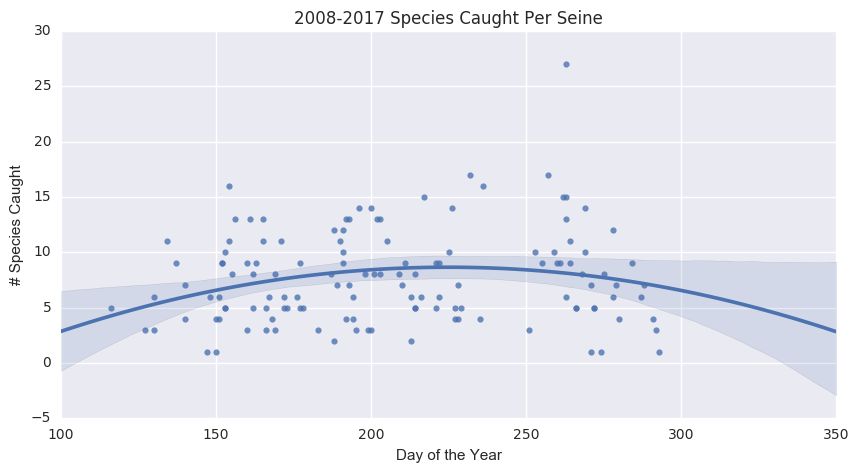

In [18]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df['Day of the Year'], df['# Species Caught'], ci = 95, order =2)
ax.set_title('2008-2017 Species Caught Per Seine')
ax.figure.savefig('Graphs/BOP_2008_2017_Species_Caught_Per_Seine')

In [19]:
df['Month'] =  [x.month for x in df['Date']]

In [20]:
from collections import Counter

In [21]:
from collections import defaultdict, Counter
species_per_month =  {4:Counter(defaultdict(int)), 5:Counter(defaultdict(int)), 6:Counter(defaultdict(int)), 7:Counter(defaultdict(int)), 
                      8:Counter(defaultdict(int)), 9:Counter(defaultdict(int)), 10:Counter(defaultdict(int))}
for i in range(4,11):
    month_df = df[df['Month'] == i]
    for row in month_df.iterrows():
        for animal in row[1]['Corrected Common Name'].split(','):
            species_per_month[i][animal] += 1

In [22]:
#species_per_month

In [23]:
for month in range(4,11):
    for org in species_per_month[month].keys():
        species_per_month[month][org] /= 1.0 * len(df[df['Month'] == month]['Date'])

## Let's look into trends in the popularity of species in different months

In [24]:
for i in range(4,11):
    print "The most popular species is " + str(species_per_month[i].most_common(20))

The most popular species is [('unidentified shrimp', 1.0), ('seven spine shrimp', 1.0), ('striped bass', 1.0), ('tunicate', 1.0), ('unidentified snail', 1.0)]
The most popular species is [('comb jelly', 0.4666666666666667), ('striped bass', 0.4), ('atlantic silverside', 0.4), ('unidentified shrimp', 0.4), ('northern pipefish', 0.3333333333333333), ('bay anchovy', 0.3333333333333333), ('green crab', 0.3333333333333333), ('atlantic tomcod', 0.26666666666666666), ('unidentified herring', 0.2), ('unidentified flatfish', 0.2), ('asian shore crab', 0.2), ('seven spine shrimp', 0.2), ('spotted hake', 0.2), ('blue crab', 0.13333333333333333), ('unidentified snail', 0.13333333333333333), ('moon jelly', 0.13333333333333333), ('glass shrimp', 0.13333333333333333), ('mud snail', 0.13333333333333333), ('amphipod', 0.06666666666666667), ('pollock', 0.06666666666666667)]
The most popular species is [('comb jelly', 0.7586206896551724), ('blue crab', 0.4827586206896552), ('asian shore crab', 0.48275862

In [25]:
b = df[['Month', '# Species Caught']].groupby('Month', as_index = False).mean()

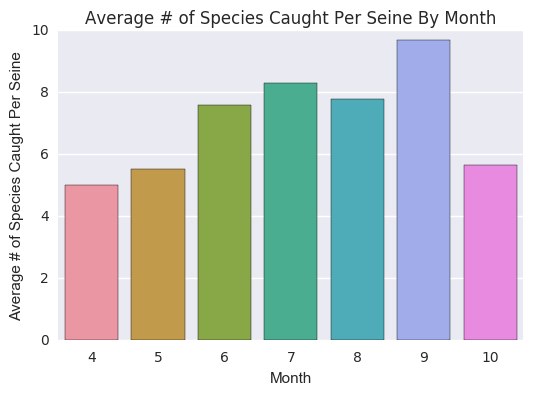

In [26]:
sns.barplot(b['Month'], b['# Species Caught'] )
plt.title("Average # of Species Caught Per Seine By Month")
plt.ylabel("Average # of Species Caught Per Seine")
plt.savefig('Graphs/Average Number of Species Caught Per Seine By Month')

In [29]:
total_fish = []
for i,x in enumerate(list(df['Grouped Corrected Common Name'])):
    sum_fish = 0
    names = x.split(',')
    counts = list(df['Corrected Quantity'])[i].split(',')
    day_list =  zip(names, counts)
    for species in day_list:
        if species[0] != 'comb jelly':
            sum_fish += int(species[1])
    total_fish.append(sum_fish)

In [30]:
df['Total Organisms Caught'] = total_fish

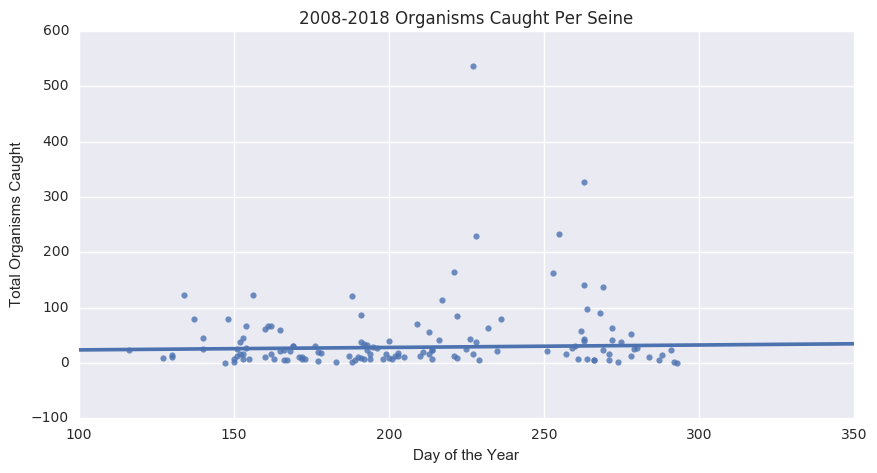

In [32]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df['Day of the Year'], df['Total Organisms Caught'],ci=False, robust=True)
ax.set_title('2008-2018 Organisms Caught Per Seine')


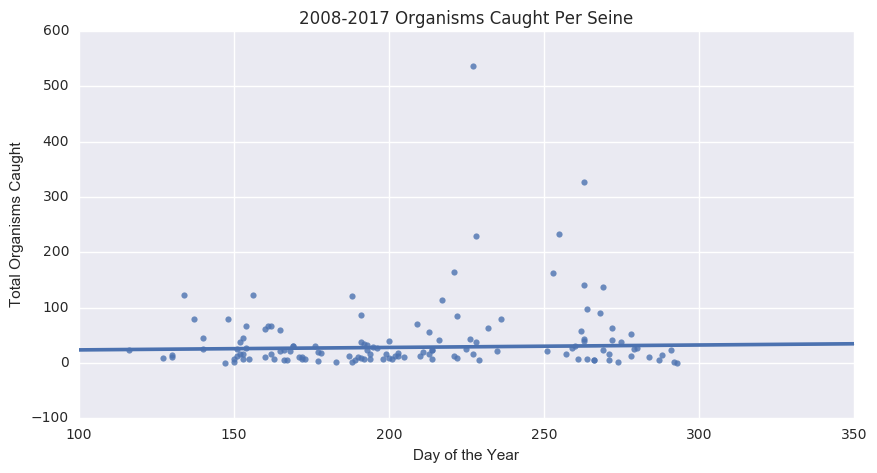

In [33]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df['Day of the Year'], df['Total Organisms Caught'],ci=False, robust=True)
ax.set_title('2008-2018 Organisms Caught Per Seine')

(0, 100)

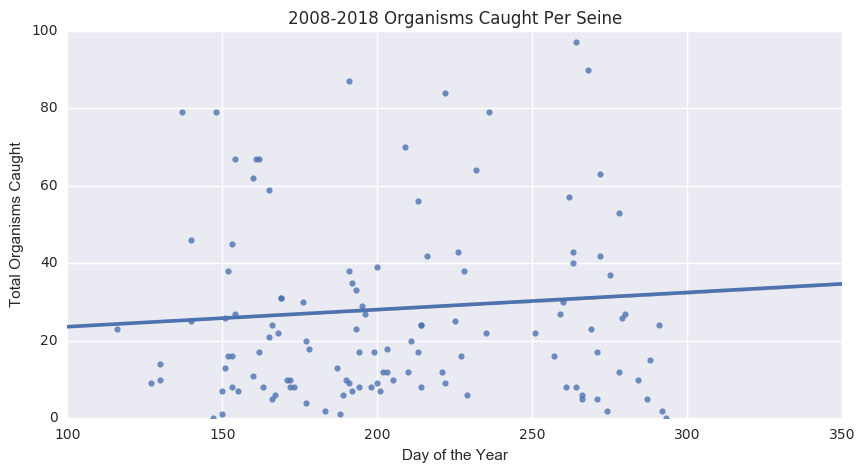

In [42]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df['Day of the Year'], df['Total Organisms Caught'],ci=False, robust=True)
ax.set_title('2008-2018 Organisms Caught Per Seine')
ax.set_ylim(0,100)


In [35]:
late_df = df[df['year']> 2010]

In [36]:
late_df[late_df['Total Organisms Caught'] < 1]['Common Name']

84    comb jelly
85    comb jelly
Name: Common Name, dtype: object

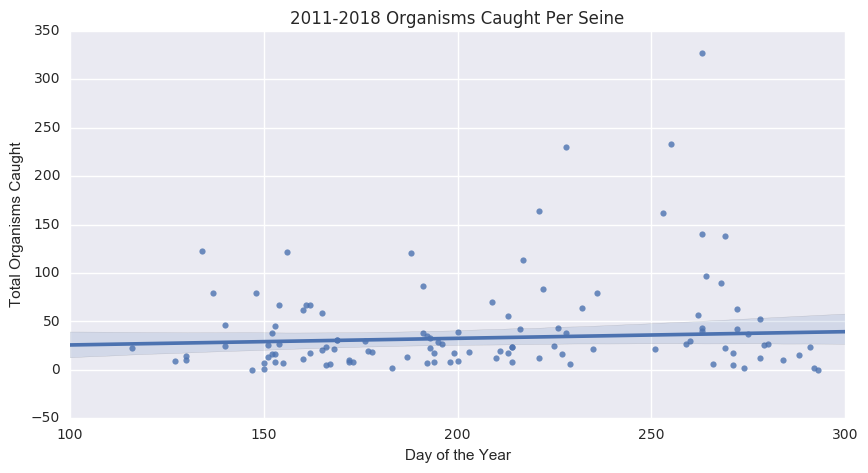

In [45]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(late_df['Day of the Year'], late_df['Total Organisms Caught'], robust = True)
ax.set_title('2011-2018 Organisms Caught Per Seine')
ax.set_ylim(-50,350)
ax.set_xlim(100,300)
ax.figure.savefig('Graphs/BOP_2011_2018_Organisms_Caught_Per_Seine')

In [46]:
late_df['Month'] = [x.month for x in late_df['Date']]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [47]:
late_df.head()

,Unnamed: 0,Date,Time,Weather & Air Temp:,Water Temp:,Corrected Water Temp:,pH,Corrected pH,DO,Corrected DO,...,Instructors/ Seine Staff:,# student seiners (CLASSES ONLY),# of visitors (Public Seine ONLY),# Brought to Ed Center,NOTES FROM SEINEING SEASON:,year,# Species Caught,Day of the Year,Month,Total Organisms Caught
17,17,2011-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2011,6,130,5,14
18,18,2011-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2011,11,134,5,123
19,19,2011-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2011,7,140,5,46
20,20,2011-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2011,6,148,5,79
21,21,2011-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2011,8,162,6,67


In [48]:
a = late_df[['Month', 'Total Organisms Caught']].groupby('Month',as_index=False).median()

In [49]:
a

,Month,Total Organisms Caught
0,4,23.0
1,5,16.0
2,6,21.5
3,7,21.5
4,8,38.0
5,9,43.0
6,10,15.0


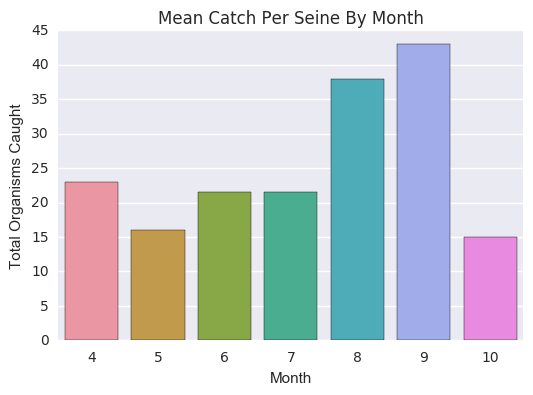

In [50]:
# Made better graph elsewhere, don't save
sns.barplot(a['Month'], a['Total Organisms Caught'])
plt.title('Mean Catch Per Seine By Month')


In [51]:
late_df.head()
a = late_df[['Day of the Year', 'Total Organisms Caught']].groupby(pd.cut(late_df['Day of the Year'], range(100,301,50))).mean()['Total Organisms Caught']

In [52]:
a

Day of the Year
(100, 150]    34.666667
(150, 200]    30.106383
(200, 250]    71.791667
(250, 300]    59.000000
Name: Total Organisms Caught, dtype: float64

In [53]:
df_2017 = df[df['year'] == 2017]

In [54]:
df_2017['# Species Caught'] = [len(list(set(x.split(',')))) for x in df_2017['Corrected Common Name']]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


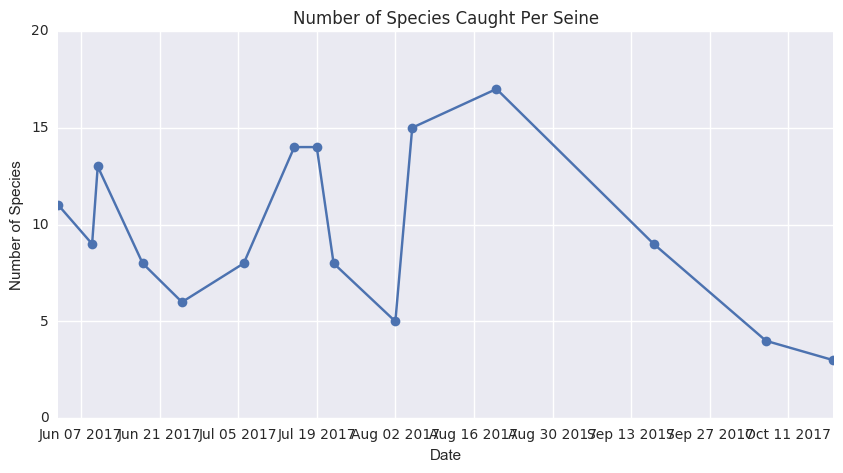

In [55]:
plt.figure(figsize=(10,5))
plt.title('Number of Species Caught Per Seine')
plt.xlabel('Date')
plt.ylabel('Number of Species')
plt.ylim(0,20)
ax = plt.plot(df_2017['Date'], df_2017['# Species Caught'], marker='o')
plt.savefig('Graphs/BOP_Line_2017_Species_Caught_Per_Seine')

In [56]:
df_2017['Day of the Year'] =  [x.timetuple().tm_yday for x in df_2017['Date']]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


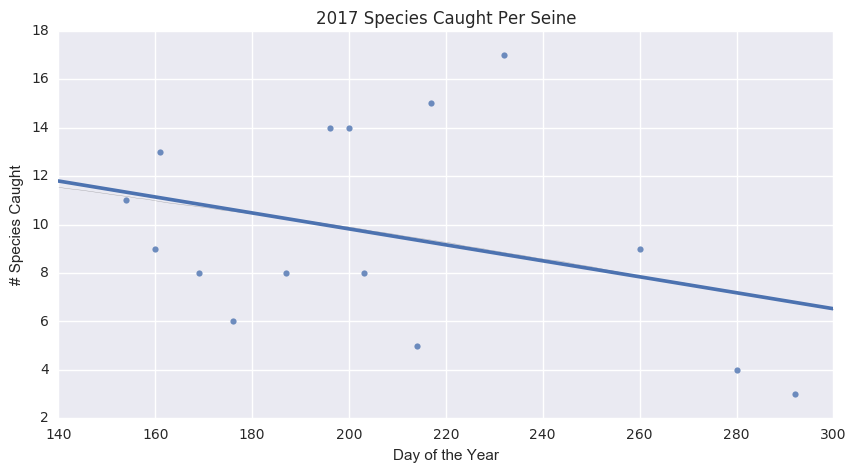

In [57]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df_2017['Day of the Year'], df_2017['# Species Caught'],ci=False)
ax.set_title('2017 Species Caught Per Seine')
ax.figure.savefig('Graphs/BOP_2017_Species_Caught_Per_Seine')

In [58]:
no_comb_df = df_2017[df_2017['Grouped Corrected Common Name'] != 'comb jelly']

In [59]:
total_fish = []
for i,x in enumerate(list(df_2017['Grouped Corrected Common Name'])):
    sum_fish = 0
    names = x.split(',')
    counts = list(df_2017['Corrected Quantity'])[i].split(',')
    day_list =  zip(names, counts)
    for species in day_list:
        if species[0] != 'comb jelly':
            sum_fish += int(species[1])
    total_fish.append(sum_fish)

   

In [60]:
df_2017['Sum Fish No Jellies'] = total_fish

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


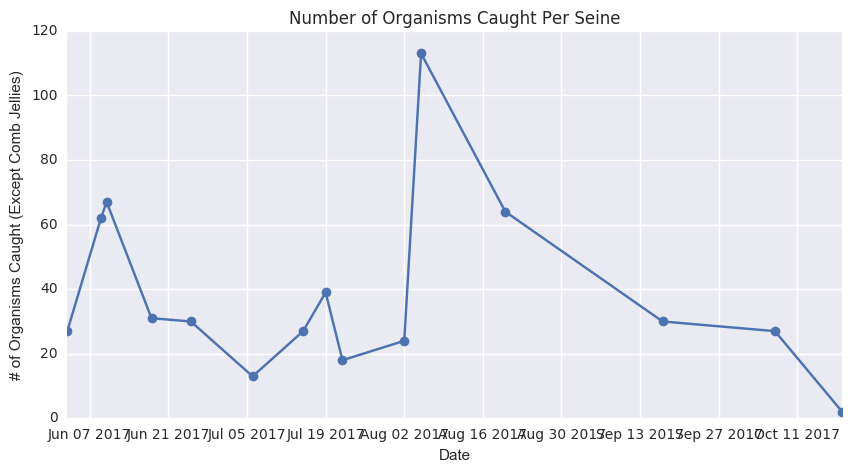

In [61]:
plt.figure(figsize=(10,5))
plt.title('Number of Organisms Caught Per Seine')
plt.xlabel('Date')
plt.ylabel('# of Organisms Caught (Except Comb Jellies)')
plt.plot(df_2017['Date'], df_2017['Sum Fish No Jellies'], marker='o')
plt.savefig('Graphs/BOP_Line_2017_Organisms_Caught_Per_Seine')

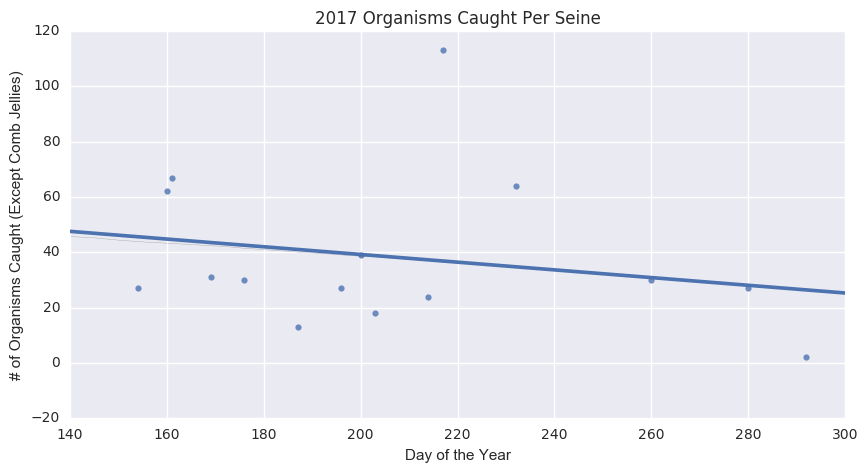

In [62]:
plt.figure(figsize=(10,5))
ax  = sns.regplot(df_2017['Day of the Year'], df_2017['Sum Fish No Jellies'],ci=False)
ax.set_title('2017 Organisms Caught Per Seine')
ax.set_ylabel('# of Organisms Caught (Except Comb Jellies)')
ax.figure.savefig('Graphs/BOP_2017_Organisms_Caught_Per_Seine')